<a href="https://colab.research.google.com/github/Hong071099/Le-Tuyet-Hong-Data-Science-Portfolio/blob/main/H%E1%BB%93ng's_Segmentation_Project_Cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Online retail - Cohort Analysis Project

> Structure:
>
> Step 1: Importing Data
>
> Step 2: Data Explore
>
> Step 3: Clearning Data
>
> Step 4:. Prepare the data for Cohort Analysis
> - Flow 1: Invoice_period
> - Flow 2: Cohort_group
> - Flow 3: Aggregate Metric
> - Flow 4: Cohort_period
>
> Step 5. Cohort analysis


## I. Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import missingno
import openpyxl
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
import gdown

# Download Data
file_id = "1od0TjqVcbtPxonZzt90yhSgMqERMwZfk"
output_file = "Online_Retail.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)
df = pd.read_csv("Online_Retail.csv")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1od0TjqVcbtPxonZzt90yhSgMqERMwZfk
To: /content/Online_Retail.csv
100%|██████████| 44.5M/44.5M [00:00<00:00, 138MB/s]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


## II. Data Explore

In [ ]:
# Understand about datatypes, null or non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [ ]:
# Change datatypes
df['CustomerID'] = df['CustomerID'].astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Create order value
df['Amount'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
# Get overview about dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
Amount,541909.0,17.987795,-168469.6,3.4,9.75,17.4,168469.6,378.810824


In [ ]:
df.describe(percentiles = [0.05,0.25,0.95]).T

,count,mean,min,5%,25%,50%,95%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,1.0,3.0,29.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2010-12-13 09:35:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-11-30 14:41:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,0.42,1.25,2.08,9.95,38970.0,96.759853
Amount,541909.0,17.987795,-168469.6,0.83,3.4,9.75,59.4,168469.6,378.810824


In [ ]:
df.duplicated().sum()

np.int64(5268)

In [ ]:
# Check null value
miss_value = df.isna().sum()
miss_value


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Amount,0


<Axes: >

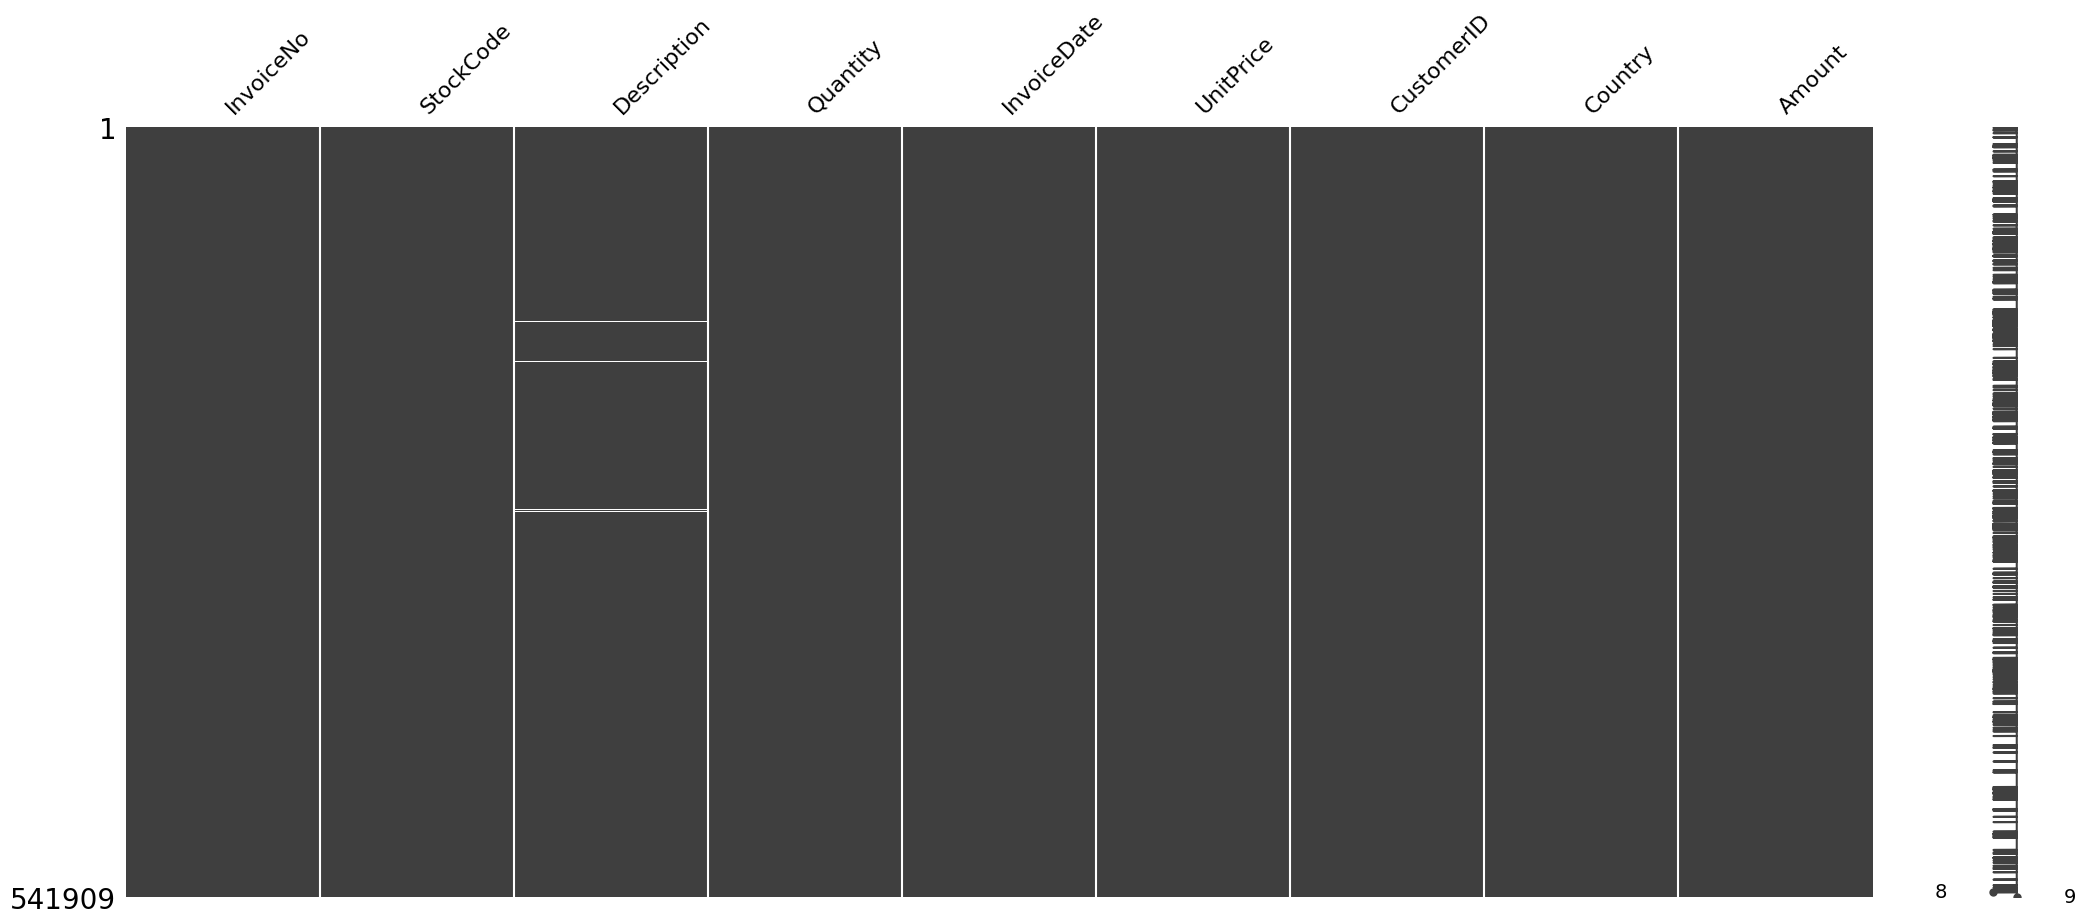

In [ ]:
# Using missingno to explore the missing values of datasets
missingno.matrix(df)

<Axes: >

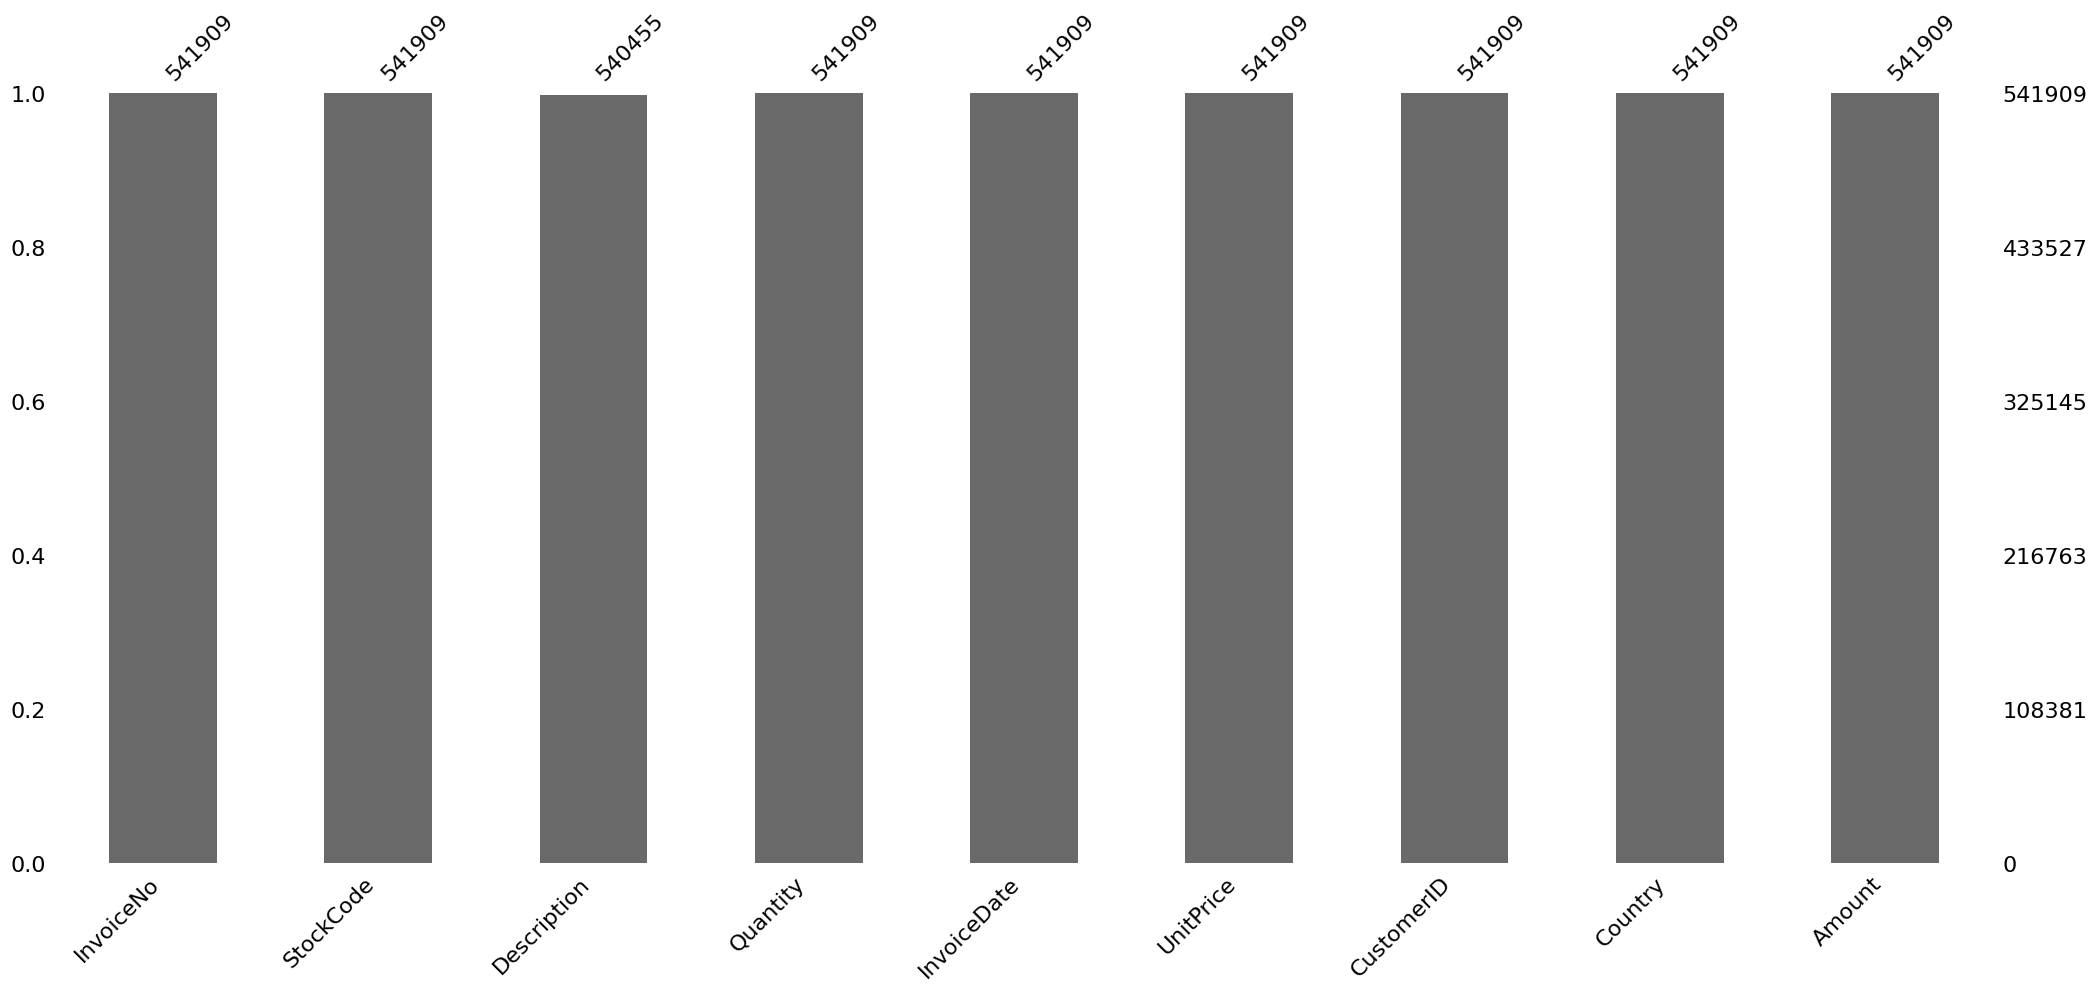

In [ ]:
missingno.bar(df)

In [ ]:
# Drop missing value
df.dropna(inplace = True)

In [ ]:
# Drop Duplicatee
df.drop_duplicates(inplace=True)

## III. Cleaning Data

<Axes: >

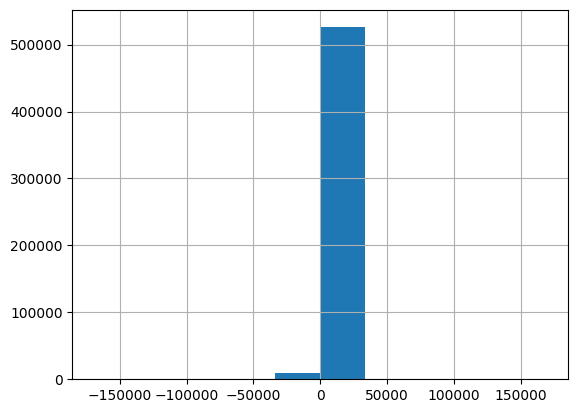

In [ ]:
#Deep-dive histogram of order_value
df.Amount.hist()

<Axes: >

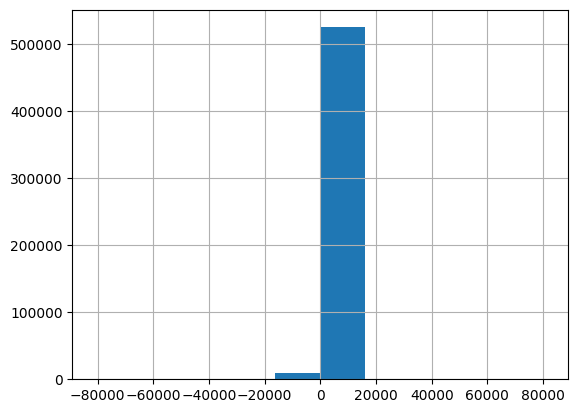

In [ ]:
#Deep-dive histogram of Quantity, there's some values which is < 0 and can not view distribution clearly
df.Quantity.hist()

In [ ]:
# Detect outliers q95
quantity_cap_95 = df['Quantity'].quantile(0.95)
amount_cap_95 = df['Amount'].quantile(0.95)

In [ ]:
quantity_cap = quantity_cap_95
amount_cap = amount_cap_95
amount_value_flr = 0

df = df[(df.Quantity <= quantity_cap) & (df.Amount <= amount_cap) & (df.Amount > amount_value_flr)]
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,488016.0,5.760325,1.0,1.0,3.0,9.0,30.0,6.221566
InvoiceDate,488016,2011-07-04 17:08:17.764704,2010-12-01 08:26:00,2011-03-28 07:53:00,2011-07-20 11:22:00,2011-10-19 13:58:00,2011-12-09 12:50:00,NaN
UnitPrice,488016.0,3.275606,0.001,1.25,2.1,4.13,58.5,3.550883
Amount,488016.0,11.362888,0.001,3.75,8.5,16.5,59.4,10.028625


<Axes: >

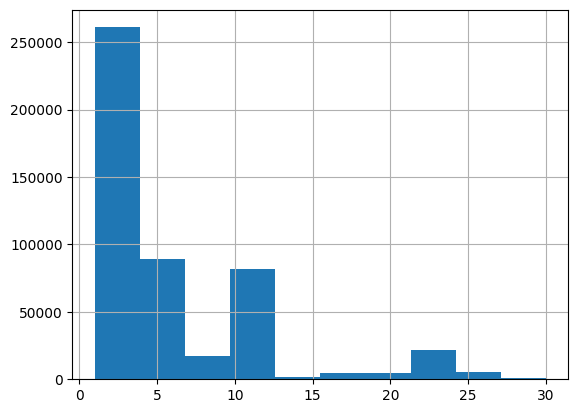

In [ ]:
df.Quantity.hist()

In [ ]:
def lambda_func(x:dt.datetime) -> str:
    return x.strftime('%Y-%m')

## Prepare the Data for Cohort Analysis

### Step 1. `invoice_period`

Generate the invoice_period by extracting Year-Month of InvoiceDate. By this, we change the frequency from Daily to Monthly.

In [ ]:
df['invoice_period'] = df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,invoice_period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


### Step 2. `cohort_group`

- Set index to `CustomerID`
- `groupby(level=0)` which is equivalent to groupby `CustomerID`
- Remember the reset the index

> Discussion: What happend if we do not set the index and `groupby(level=0)`? Hint: Try to run `groupby('CustomerID')` directly?

In [ ]:
# groupby will return the series with length shorter the the original, by the trick of set index, it enables us to group by, keep the original length
df.set_index('CustomerID', inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Amount,invoice_period,cohort_group
CustomerID,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


In [ ]:
# first day of purchase
df['cohort_group'] = df.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Amount,invoice_period,cohort_group
CustomerID,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom,15.30,2010-12,2010-12
17850.0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom,25.50,2010-12,2010-12
17850.0,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,United Kingdom,11.10,2010-12,2010-12
17850.0,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,United Kingdom,11.10,2010-12,2010-12


In [ ]:
df.reset_index(inplace=True)
df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Amount,invoice_period,cohort_group
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
1,17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


### Step 3. Aggregate Metrics

In [ ]:
# Calculate the aggregate metrics to visualize in cohort
g = df.groupby (['cohort_group', 'invoice_period'])
cohorts = g.agg({
    'CustomerID': pd.Series.nunique,
    'Description': pd.Series.nunique,
    'Quantity': np.sum,
    'Amount': np.sum

})

cohorts.rename(columns = {
    'CustomerID': 'cust_cnt',
    'Description': 'product_item_cnt',
    'Quantity': 'total_quant',
    'Amount': 'order_value'
}, inplace=True)
cohorts.head()


In [ ]:
cohorts.head()

cust_cnt  product_item_cnt  total_quant  \
cohort_group invoice_period                                            
2010-12      2010-12              829              2368       147428   
             2011-01              298              1709        65845   
             2011-02              254              1617        50311   
             2011-03              306              1787        65749   
             2011-04              292              1731        59234   

                             total_value  
cohort_group invoice_period               
2010-12      2010-12           292102.91  
             2011-01           117929.78  
             2011-02            91626.02  
             2011-03           117187.14  
             2011-04           103408.53

In [ ]:
cohorts_1 = cohorts.copy()

In [ ]:
cohorts_1.head()

cust_cnt  product_item_cnt  total_quant  \
cohort_group invoice_period                                            
2010-12      2010-12              829              2368       147428   
             2011-01              298              1709        65845   
             2011-02              254              1617        50311   
             2011-03              306              1787        65749   
             2011-04              292              1731        59234   

                             total_value  
cohort_group invoice_period               
2010-12      2010-12           292102.91  
             2011-01           117929.78  
             2011-02            91626.02  
             2011-03           117187.14  
             2011-04           103408.53

### Step 4. `cohort_period`

We want to count the transaction month relative from cohort_date (ie. 1, 2, 3 month after the date of acquired - cohort_date)

In [ ]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df.reset_index(level=0, drop=True)  # Drop the extra cohort_group level

# def cohort_period(df):
#   df['cohort_period'] = np.arange(len(df)) + 1
#   return df

In [ ]:
cohorts_1 = cohorts_1.groupby(level=0).apply(cohort_period) # level 0: cohort_group, apply for each row (invoice_periods)

In [ ]:
cohorts_1.head(5)

cust_cnt  product_item_cnt  total_quant  \
cohort_group invoice_period                                            
2010-12      2010-12              829              2368       147428   
             2011-01              298              1709        65845   
             2011-02              254              1617        50311   
             2011-03              306              1787        65749   
             2011-04              292              1731        59234   

                             total_value  cohort_period  
cohort_group invoice_period                              
2010-12      2010-12           292102.91              1  
             2011-01           117929.78              2  
             2011-02            91626.02              3  
             2011-03           117187.14              4  
             2011-04           103408.53              5

In [ ]:
cohorts_1 = cohorts_1.reset_index(level=['invoice_period'])
cohorts_1 = cohorts_1.set_index(['cohort_period'], append=True)

In [ ]:
cohorts_1.head()

invoice_period  cust_cnt  product_item_cnt  \
cohort_group cohort_period                                              
2010-12      1                    2010-12       829              2368   
             2                    2011-01       298              1709   
             3                    2011-02       254              1617   
             4                    2011-03       306              1787   
             5                    2011-04       292              1731   

                            total_quant  total_value  
cohort_group cohort_period                            
2010-12      1                   147428    292102.91  
             2                    65845    117929.78  
             3                    50311     91626.02  
             4                    65749    117187.14  
             5                    59234    103408.53

In [ ]:
cohorts_1.groupby(level=0).apply(lambda x: print(x))

                           invoice_period  cust_cnt  product_item_cnt  \
cohort_group cohort_period                                              
2010-12      1                    2010-12       829              2368   
             2                    2011-01       298              1709   
             3                    2011-02       254              1617   
             4                    2011-03       306              1787   
             5                    2011-04       292              1731   
             6                    2011-05       325              1779   
             7                    2011-06       297              1798   
             8                    2011-07       274              1882   
             9                    2011-08       281              1863   
             10                   2011-09       311              2053   
             11                   2011-10       298              2007   
             12                   2011-11       409

""


In [ ]:
# # cohorts.reset_index(inplace=True)
# cohorts.set_index(['cohort_group','invoice_period'], inplace=True)
# cohorts.head()

In [ ]:
# # cohorts.reset_index(inplace=True)
# cohorts.set_index(['cohort_period','cohort_group'], inplace=True)
# cohorts.head()

## Cohort Analysis

### Monthly Total Sales Across Cohorts

In [ ]:
cohorts_1['total_value'].unstack(0)

cohort_group,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
cohort_period,,,,,,,,,,,,,
1,292102.91,125905.880,114794.18,142649.07,92425.771,81077.16,66156.30,57148.941,61765.70,104583.791,125693.51,99566.49,7972.4
2,117929.78,27304.900,15539.71,19518.98,18431.350,12206.94,8161.62,7547.660,15289.16,23616.130,31833.60,9052.57,NaN
3,91626.02,32484.030,21563.95,35588.41,16561.830,13128.47,10024.55,13740.960,29383.18,29137.550,8631.65,NaN,NaN
4,117187.14,24270.350,35076.76,30444.85,17549.160,14104.62,18874.46,15899.980,31377.65,10965.190,NaN,NaN,NaN
5,103408.53,44771.550,30208.79,30086.25,16852.720,22318.23,19294.91,16522.410,11838.62,NaN,NaN,NaN,NaN
6,133159.81,39865.020,23709.98,28636.91,24031.660,26104.53,26721.20,5300.090,NaN,NaN,NaN,NaN,NaN
7,117402.13,33324.820,30447.09,42499.64,23466.140,25302.55,5597.00,NaN,NaN,NaN,NaN,NaN,NaN
8,116666.19,34635.370,41752.46,45260.40,26365.590,8721.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,117469.70,46898.561,37182.50,48324.58,5611.980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# cohorts_size.head()

In [ ]:
# Thay đổi thứ tự unstack để đảo trục
unstacked_value = cohorts_1['total_value'].unstack(1)
unstacked_value

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,292102.910,117929.78,91626.02,117187.14,103408.53,133159.81,117402.13,116666.19,117469.700,155671.97,146594.96,222714.09,76778.23
2011-01,125905.880,27304.90,32484.03,24270.35,44771.55,39865.02,33324.82,34635.37,46898.561,58996.98,66760.29,13435.12,NaN
2011-02,114794.180,15539.71,21563.95,35076.76,30208.79,23709.98,30447.09,41752.46,37182.500,39423.09,7296.17,NaN,NaN
2011-03,142649.070,19518.98,35588.41,30444.85,30086.25,28636.91,42499.64,45260.40,48324.580,9264.62,NaN,NaN,NaN
2011-04,92425.771,18431.35,16561.83,17549.16,16852.72,24031.66,23466.14,26365.59,5611.980,NaN,NaN,NaN,NaN
2011-05,81077.160,12206.94,13128.47,14104.62,22318.23,26104.53,25302.55,8721.15,NaN,NaN,NaN,NaN,NaN
2011-06,66156.300,8161.62,10024.55,18874.46,19294.91,26721.20,5597.00,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,57148.941,7547.66,13740.96,15899.98,16522.41,5300.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,61765.700,15289.16,29383.18,31377.65,11838.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


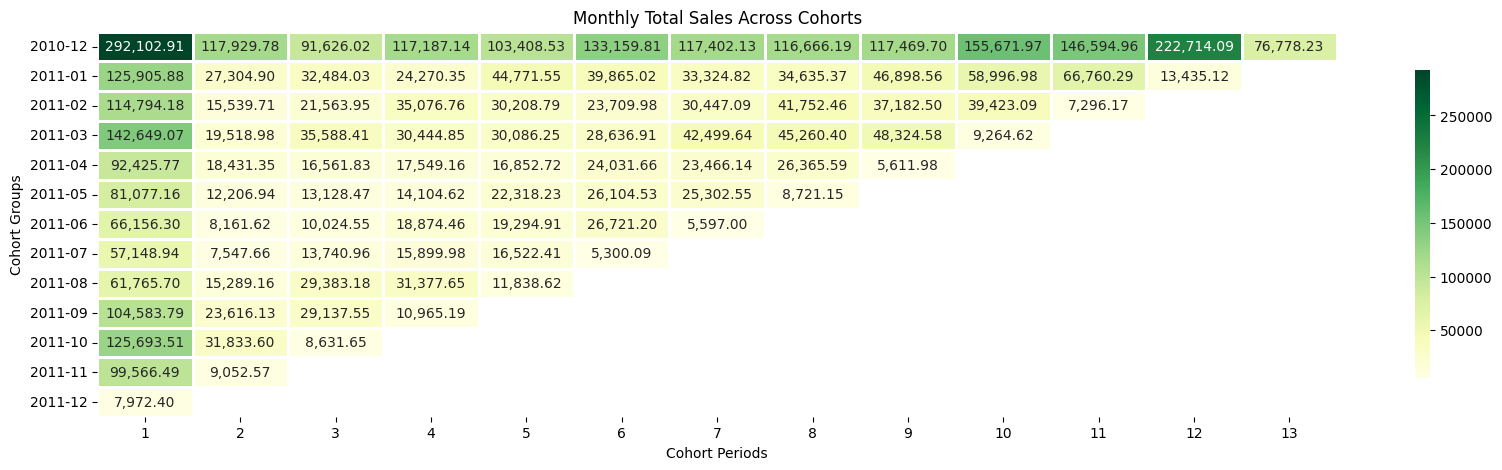

In [ ]:
# Vẽ heatmap với cohort_group trên trục y và cohort_period trên trục x
plt.figure(figsize=(20, 5))
ax = sns.heatmap(unstacked_value, annot=True, cmap='YlGn', fmt=",.2f",
                 linewidths=1,
                 cbar_kws={"shrink": .8})
ax.set_ylabel('Cohort Groups')  # Cohort Groups trên trục Y
ax.set_xlabel('Cohort Periods')  # Cohort Periods trên trục X
ax.set_title('Monthly Total Sales Across Cohorts')  # Tiêu đề biểu đồ
plt.show()


In [ ]:
# # Chia unstacked_value (total_value) cho cohort_size theo từng cohort_group
# normalized_value = unstacked_value.divide(cohorts_size, axis=0)
# normalized_value

### Retention

> Retention of each cohort over time (periods) is the number of active users at each period, divide for the cohort size (= user count in first periods)
- Size of cohort (`denomiator`)
- Spread the `cust_cnt` - active users over periods of each cohorts
- Divide for the **retention rate**: `cust_retention.divide(cohorts_size, axis=0)`

In [ ]:
cohorts_2 = cohorts_1.copy()

In [ ]:
cust_retention = cohorts_2['cust_cnt'].unstack(1)
cust_retention.head(20)

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,829.0,298.0,254.0,306.0,292.0,325.0,297.0,274.0,281.0,311.0,298.0,409.0,210.0
2011-01,398.0,83.0,107.0,88.0,130.0,115.0,99.0,99.0,125.0,132.0,148.0,48.0,NaN
2011-02,358.0,59.0,65.0,97.0,96.0,88.0,87.0,94.0,91.0,107.0,24.0,NaN,NaN
2011-03,439.0,65.0,108.0,86.0,99.0,75.0,111.0,102.0,119.0,38.0,NaN,NaN,NaN
2011-04,294.0,57.0,57.0,57.0,55.0,66.0,64.0,75.0,21.0,NaN,NaN,NaN,NaN
2011-05,279.0,52.0,50.0,46.0,60.0,62.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06,239.0,42.0,37.0,63.0,54.0,78.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,193.0,31.0,42.0,45.0,54.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,165.0,32.0,42.0,40.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

cohorts_size = cohorts_2.groupby(level=0)['cust_cnt'].first()
cohorts_size

,cust_cnt
cohort_group,
2010-12,829
2011-01,398
2011-02,358
2011-03,439
2011-04,294
2011-05,279
2011-06,239
2011-07,193
2011-08,165


In [ ]:
cust_retention

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,829.0,298.0,254.0,306.0,292.0,325.0,297.0,274.0,281.0,311.0,298.0,409.0,210.0
2011-01,398.0,83.0,107.0,88.0,130.0,115.0,99.0,99.0,125.0,132.0,148.0,48.0,NaN
2011-02,358.0,59.0,65.0,97.0,96.0,88.0,87.0,94.0,91.0,107.0,24.0,NaN,NaN
2011-03,439.0,65.0,108.0,86.0,99.0,75.0,111.0,102.0,119.0,38.0,NaN,NaN,NaN
2011-04,294.0,57.0,57.0,57.0,55.0,66.0,64.0,75.0,21.0,NaN,NaN,NaN,NaN
2011-05,279.0,52.0,50.0,46.0,60.0,62.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06,239.0,42.0,37.0,63.0,54.0,78.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,193.0,31.0,42.0,45.0,54.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,165.0,32.0,42.0,40.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Chia từng giá trị trong cust_retention cho cohort_size
cust_retention = cust_retention.divide(cohorts_size, axis=0)
cust_retention
# Hiển thị kết quả
# print(cust_retention)


cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_group,,,,,,,,,,,,,
2010-12,1.0,0.359469,0.306393,0.369119,0.352232,0.392039,0.358263,0.330519,0.338963,0.375151,0.359469,0.493366,0.253317
2011-01,1.0,0.208543,0.268844,0.221106,0.326633,0.288945,0.248744,0.248744,0.314070,0.331658,0.371859,0.120603,NaN
2011-02,1.0,0.164804,0.181564,0.270950,0.268156,0.245810,0.243017,0.262570,0.254190,0.298883,0.067039,NaN,NaN
2011-03,1.0,0.148064,0.246014,0.195900,0.225513,0.170843,0.252847,0.232346,0.271071,0.086560,NaN,NaN,NaN
2011-04,1.0,0.193878,0.193878,0.193878,0.187075,0.224490,0.217687,0.255102,0.071429,NaN,NaN,NaN,NaN
2011-05,1.0,0.186380,0.179211,0.164875,0.215054,0.222222,0.268817,0.093190,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.175732,0.154812,0.263598,0.225941,0.326360,0.100418,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.160622,0.217617,0.233161,0.279793,0.124352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.193939,0.254545,0.242424,0.139394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


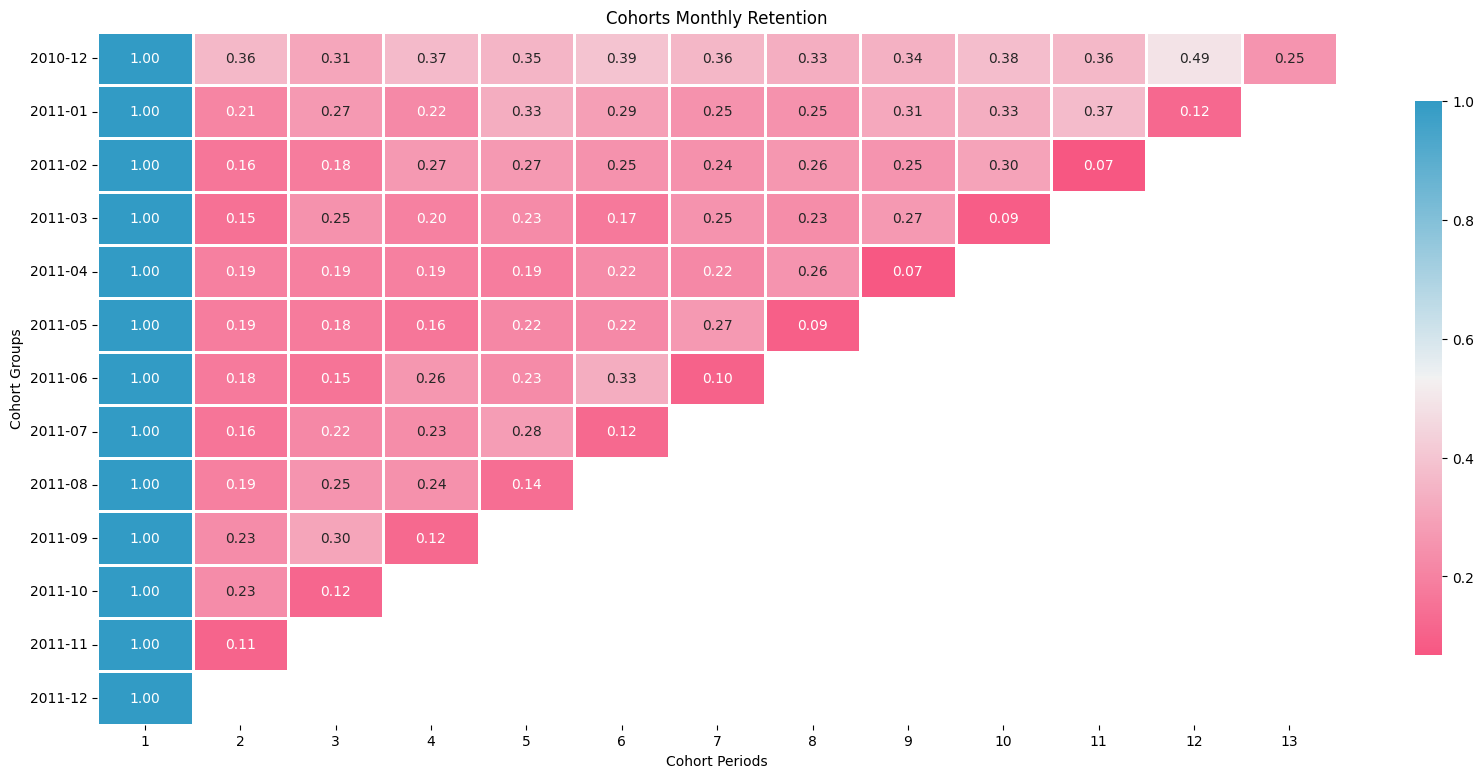

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo heatmap với dữ liệu hiện tại
plt.figure(figsize=(20, 9))  # Điều chỉnh kích thước biểu đồ
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# Vẽ heatmap
ax = sns.heatmap(cust_retention, annot=True, cmap=cmap, fmt=".2f",
                 linewidths=1, cbar_kws={"shrink": .8})

# Cấu hình nhãn và tiêu đề
ax.set_ylabel('Cohort Groups')  # Cohort Groups ở trục Y
ax.set_xlabel('Cohort Periods')  # Cohort Periods ở trục X
ax.set_title('Cohorts Monthly Retention')  # Tiêu đề biểu đồ

plt.show()

# plt.figure(figsize=(20,9))
# cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# ax = sns.heatmap(cust_retention, annot=True, cmap=cmap,fmt=".2f",
#            linewidths=1,
#            cbar_kws={"shrink": .8})
# ax.set_ylabel('Cohort Groups')
# ax.set_xlabel('Cohort Periods')
# ax.set_title('Cohorts Monhtly Retention')